/tmp/ipykernel_26684/1660753965.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_26684/1660753965.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

===== Logistic Regression =====
Accuracy  : 0.6875
Precision : 0.5455
Recall    : 0.5455
F1-score  : 0.5455

Confusion Matrix:
 [[16  5]
 [ 5  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.55      0.55      0.55        11

    accuracy                           0.69        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.69      0.69      0.69        32


===== Decision Tree =====
Accuracy  : 0.7188
Precision : 0.6667
Recall    : 0.3636
F1-score  : 0.4706

Confusion Matrix:
 [[19  2]
 [ 7  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.67      0.36      0.47        11

    accuracy                           0.72        32
   macro avg       0.70      0.63      0.64        32
weighted avg       0.71      0.72      0.69        32




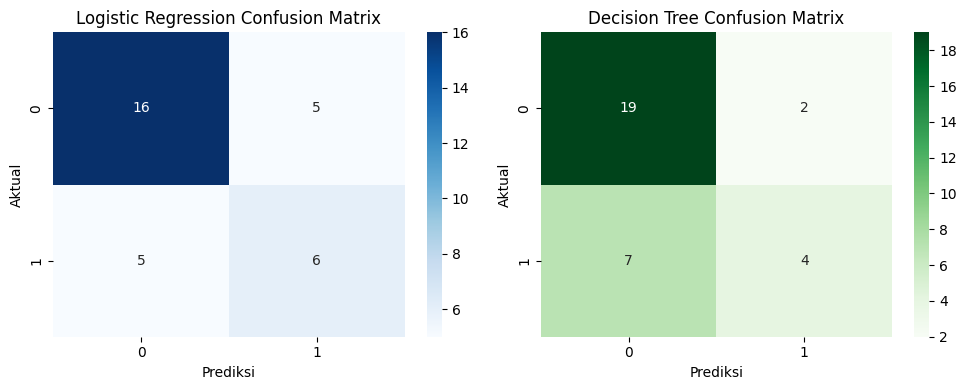

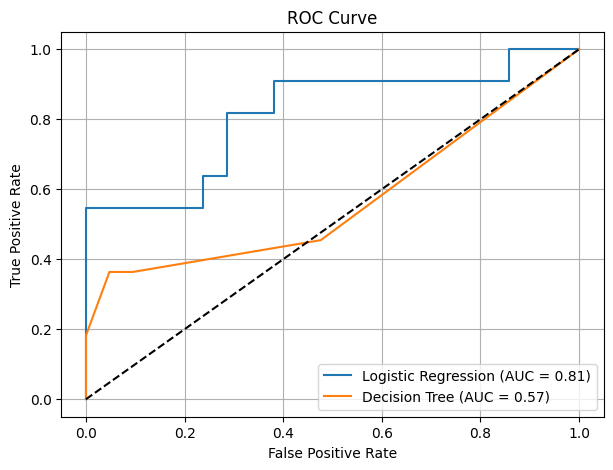

In [2]:
# ==========================================
# TITANIC CLASSIFICATION - MODEL EVALUATION
# Logistic Regression & Decision Tree
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load Dataset
# ----------------------------
df = pd.read_csv("titanic.csv")
df.head()

# ----------------------------
# 2. Preprocessing
# ----------------------------
df = df.drop(columns=['Lname', 'Name', 'Ticket', 'Cabin'], errors='ignore')

# Isi nilai kosong
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Pisahkan fitur dan target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. Model Training
# ----------------------------
log_model = LogisticRegression(max_iter=200)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# ----------------------------
# 4. Evaluasi: Confusion Matrix & Metrics
# ----------------------------
def evaluate_model(name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"===== {name} =====")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("====================================\n")

# Evaluasi dua model
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)

# ----------------------------
# 5. Visualisasi Confusion Matrix
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Aktual")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("Aktual")

plt.tight_layout()
plt.show()

# ----------------------------
# 6. ROC Curve & AUC
# ----------------------------
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
